In [ ]:
import os
print(os.path.abspath(os.curdir))
os.chdir("..")
print(os.path.abspath(os.curdir))
import json
import pandas as pd
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
from request import Request, run_request
from langchain_ollama import ChatOllama
from sklearn.utils import shuffle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("data/organisciak_2023/all_data.csv")

In [3]:
df

,n_id,type,src,question,prompt,response,id,target,participant,response_num
0,453,uses,hass17,What is a surprising use for a BOTTLE?,bottle,to catch an insect in,hass17_bottle-8f9afe,3.7,hass1737,7.0
1,180,instances,setal08,What is a surprising thing that makes a NOISE?,noise,stomach (hungry),setal08_5.0-7905ba,1.3,setal085,1.0
2,1966,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,etch on a surface,hmsl_paperclip-f58dc8,3.0,hmslLr6WcnQu,4.0
3,11185,instances,setal08,What is a surprising thing that is ROUND?,round,toy,setal08_2.0-641dd1,1.0,setal08234,1.0
4,2862,uses,betal18,What is a surprising use for a ROPE?,rope,bracelet,betal18_rope-580881,1.0,betal182183,NaN
...,...,...,...,...,...,...,...,...,...,...
33107,3966,uses,snbmo09,What is a surprising use for a BOX?,box,make a design and put it on wall,snbmo09_3_box-3ff700,1.7,snbmo09194,5.0
33108,1094,uses,bs12,What is a surprising use for a BRICK?,brick,Throw in a fit of rage,bs12_brick-b0cd04,1.8,bs1280,NaN
33109,6385,uses,setal08,What is a surprising use for a KNIFE?,knife,cut grass,setal08_4.0-14e90b,1.3,setal08136,7.0
33110,1761,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,antina,hmsl_paperclip-a96241,2.5,hmsl344dbgyl,2.0


In [4]:
df[df["prompt"] == "paperclip"]

,n_id,type,src,question,prompt,response,id,target,participant,response_num
2,1966,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,etch on a surface,hmsl_paperclip-f58dc8,3.0,hmslLr6WcnQu,4.0
47,2651,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,Use the end to poke reset buttons,hmsl_paperclip-5b233b,2.5,hmsl05atXwmG,3.0
104,2158,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,knife,hmsl_paperclip-e28a09,2.7,hmslV453P9LD,4.0
139,743,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,use to carve or etch something.,hmsl_paperclip-e18b1c,2.8,hmslLN1p6396,5.0
143,85,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,Can be used to etch designs in clay,hmsl_paperclip-ef917f,3.3,hmslFh8745VU,7.0
...,...,...,...,...,...,...,...,...,...,...
32969,1820,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,button press,hmsl_paperclip-7356e3,2.3,hmslTz3xw8MP,10.0
33008,2631,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,use it after changing its shape as a sub for a...,hmsl_paperclip-56bfc2,2.8,hmslGBLQ0YK2,3.0
33059,2334,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,pick a lock,hmsl_paperclip-8aaafd,2.0,hmsls9s2shYZ,3.0
33094,97,uses,hmsl,What is a surprising use for a PAPERCLIP?,paperclip,chain necklace,hmsl_paperclip-59a163,2.3,hmsliC3RI2p2,8.0


In [5]:
df[df["type"] == "consequences"]

,n_id,type,src,question,prompt,response,id,target,participant,response_num
28,6348,consequences,setal08,What would be a surprising consequence if EVER...,shrank,it would take us forever to get from one place...,setal08_6.0-5d7bbe,1.3,setal08135,9.0
48,3668,consequences,setal08,What would be a surprising consequence if EVER...,shrank,"less pollution, no cars driving",setal08_6.0-c95ef2,1.0,setal0881,11.0
52,5472,consequences,setal08,What would be a surprising consequence if EVER...,shrank,a half a mile walk to class would take hours,setal08_6.0-8c52ba,2.3,setal08115,8.0
58,3718,consequences,setal08,What would be a surprising consequence if EVER...,shrank,no bullies-everyone is the same size,setal08_6.0-cd0bcd,1.3,setal0882,7.0
61,3734,consequences,setal08,What would be a surprising consequence if PEOP...,no sleep,longer time to go out with friends,setal08_3.0-e05b4a,1.7,setal0883,7.0
...,...,...,...,...,...,...,...,...,...,...
33079,3106,consequences,setal08,What would be a surprising consequence if EVER...,shrank,couldn't drive big cars,setal08_6.0-972d15,1.7,setal0869,5.0
33080,3659,consequences,setal08,What would be a surprising consequence if EVER...,shrank,not go inside,setal08_6.0-9732b4,1.0,setal0881,2.0
33091,1520,consequences,setal08,What would be a surprising consequence if PEOP...,no sleep,books would be read more often,setal08_3.0-050998,2.0,setal0834,6.0
33100,3521,consequences,setal08,What would be a surprising consequence if EVER...,shrank,no homes,setal08_6.0-e87e1b,1.0,setal0878,3.0


In [6]:
df["prompt"].value_counts()

prompt
brick        8117
box          4351
rope         3117
knife        2869
noise        2710
round        2157
paperclip    1759
no sleep     1618
shrank       1580
bottle       1106
book          697
table         580
pants         536
tire          520
fork          518
shoe          454
shovel        423
Name: count, dtype: int64

In [7]:
df["type"].value_counts()

type
uses            25047
instances        4867
consequences     3198
Name: count, dtype: int64

## Evaluate few-shot Gemma3n

In [8]:
template_flexible = """
Below is a list of uses for {object}. On a scale of 10-50, judge how original each use for {object} is, 
where 10 is "not at all creative" and 50 is "very creative":

USES
{uses_block}
{rating_target_index}. {to_evaluate_use}

RATINGS
{ratings_block}
{rating_target_index}.

Output only the rating for use #{rating_target_index}. Only the number.
""".strip()

In [9]:
def build_prompt_for_object(object_name, uses, ratings_prefilled, target_index, to_evaluate_use):
    # 1-based numbering so ratings and target_index align
    uses_lines = [f"{i}. {u}" for i, u in enumerate(uses, start=1)]
    
    ratings_lines = []
    for i in range(1, len(uses) + 1):
        if i in ratings_prefilled:
            ratings_lines.append(f"{i}. {ratings_prefilled[i]}")
        else:
            ratings_lines.append(f"{i}.")
    
    return template_flexible.format(
        object=object_name,
        uses_block="\n".join(uses_lines),
        ratings_block="\n".join(ratings_lines),
        rating_target_index=target_index,
        to_evaluate_use=to_evaluate_use
    )

In [10]:
brick_responses = df[df["prompt"] == "brick"]
brick_responses = shuffle(brick_responses, random_state=41)
brick_responses

,n_id,type,src,question,prompt,response,id,target,participant,response_num
11297,3229,uses,hmsl,What is a surprising use for a BRICK?,brick,iron,hmsl_brick-04a807,3.3,hmsl63a1Gxgq,4.0
4602,1600,uses,bs12,What is a surprising use for a BRICK?,brick,bookend,bs12_brick-0809cd,1.8,bs12118,NaN
9616,1264,uses,setal08,What is a surprising use for a BRICK?,brick,a kicking tee,setal08_1.0-581295,2.7,setal0829,5.0
26604,1712,uses,bs12,What is a surprising use for a BRICK?,brick,build a bench,bs12_brick-e43895,1.4,bs12126,NaN
25750,2527,uses,setal08,What is a surprising use for a BRICK?,brick,smashing windows,setal08_1.0-03c1ce,1.3,setal0858,1.0
...,...,...,...,...,...,...,...,...,...,...
21322,1011,uses,bs12,What is a surprising use for a BRICK?,brick,Primitive hunting tool,bs12_brick-825a7b,1.4,bs1271,NaN
16663,5257,uses,setal08,What is a surprising use for a BRICK?,brick,place under tires on a hill,setal08_1.0-5955d1,1.7,setal08112,6.0
16289,3075,uses,dod20,What is a surprising use for a BRICK?,brick,workout equipment,dod20_brick-2bef8a,4.0,dod2042,2.0
3824,1114,uses,hmsl,What is a surprising use for a BRICK?,brick,elevator weight,hmsl_brick-48efbb,2.5,hmsl4dUr6hnh,13.0


In [11]:
prompt_uses_first_10 = brick_responses.head(10)
prompt_uses_first_10

,n_id,type,src,question,prompt,response,id,target,participant,response_num
11297,3229,uses,hmsl,What is a surprising use for a BRICK?,brick,iron,hmsl_brick-04a807,3.3,hmsl63a1Gxgq,4.0
4602,1600,uses,bs12,What is a surprising use for a BRICK?,brick,bookend,bs12_brick-0809cd,1.8,bs12118,NaN
9616,1264,uses,setal08,What is a surprising use for a BRICK?,brick,a kicking tee,setal08_1.0-581295,2.7,setal0829,5.0
26604,1712,uses,bs12,What is a surprising use for a BRICK?,brick,build a bench,bs12_brick-e43895,1.4,bs12126,NaN
25750,2527,uses,setal08,What is a surprising use for a BRICK?,brick,smashing windows,setal08_1.0-03c1ce,1.3,setal0858,1.0
17505,192,uses,bs12,What is a surprising use for a BRICK?,brick,gravestone,bs12_brick-89eb79,1.4,bs1215,NaN
4043,45,uses,setal08,What is a surprising use for a BRICK?,brick,paper weight,setal08_1.0-a96510,1.3,setal082,1.0
13376,674,uses,hass17,What is a surprising use for a BRICK?,brick,build a building,hass17_brick-f69aac,1.0,hass1720,2.0
10079,1447,uses,dod20,What is a surprising use for a BRICK?,brick,doorstopper,dod20_brick-d1f35a,2.3,dod2060,1.0
21384,823,uses,hass17,What is a surprising use for a BRICK?,brick,decoration,hass17_brick-bc75c8,2.0,hass1714,4.0


In [12]:
brick_responses_test = brick_responses.iloc[10:]
brick_responses_test

,n_id,type,src,question,prompt,response,id,target,participant,response_num
13203,1137,uses,hmsl,What is a surprising use for a BRICK?,brick,fly swatter,hmsl_brick-c7621f,3.3,hmslTR0n5Xkg,5.0
5243,1574,uses,dod20,What is a surprising use for a BRICK?,brick,use as exercise weight,dod20_brick-217f58,4.0,dod2016,7.0
19317,1732,uses,snbmo09,What is a surprising use for a BRICK?,brick,weapon if danger,snbmo09_1_brick-4627bd,1.2,snbmo0985,4.0
3686,3631,uses,dod20,What is a surprising use for a BRICK?,brick,to use for an art project,dod20_brick-643061,3.0,dod2051,1.0
1285,1141,uses,bs12,What is a surprising use for a BRICK?,brick,Modern Art,bs12_brick-660fb8,1.4,bs1283,NaN
...,...,...,...,...,...,...,...,...,...,...
21322,1011,uses,bs12,What is a surprising use for a BRICK?,brick,Primitive hunting tool,bs12_brick-825a7b,1.4,bs1271,NaN
16663,5257,uses,setal08,What is a surprising use for a BRICK?,brick,place under tires on a hill,setal08_1.0-5955d1,1.7,setal08112,6.0
16289,3075,uses,dod20,What is a surprising use for a BRICK?,brick,workout equipment,dod20_brick-2bef8a,4.0,dod2042,2.0
3824,1114,uses,hmsl,What is a surprising use for a BRICK?,brick,elevator weight,hmsl_brick-48efbb,2.5,hmsl4dUr6hnh,13.0


In [13]:
prompt_uses_first_10["response"].to_list()

['iron',
 'bookend',
 'a kicking tee',
 'build a bench',
 'smashing windows',
 'gravestone',
 'paper weight',
 'build a building',
 'doorstopper',
 'decoration']

In [14]:
{i+1: int(x * 10) for i, x in enumerate(prompt_uses_first_10["target"].to_list())}

{1: 33, 2: 18, 3: 27, 4: 14, 5: 13, 6: 14, 7: 13, 8: 10, 9: 23, 10: 20}

In [15]:
final_prompt_brick = build_prompt_for_object(
    "BRICK",
    prompt_uses_first_10["response"].to_list(),
    {i+1: int(x * 10) for i, x in enumerate(prompt_uses_first_10["target"].to_list())},
    target_index=11,
    to_evaluate_use="{use_input}"
)
print(final_prompt_brick)

Below is a list of uses for BRICK. On a scale of 10-50, judge how original each use for BRICK is, 
where 10 is "not at all creative" and 50 is "very creative":

USES
1. iron
2. bookend
3. a kicking tee
4. build a bench
5. smashing windows
6. gravestone
7. paper weight
8. build a building
9. doorstopper
10. decoration
11. {use_input}

RATINGS
1. 33
2. 18
3. 27
4. 14
5. 13
6. 14
7. 13
8. 10
9. 23
10. 20
11.

Output only the rating for use #11. Only the number.


Let's evaluate

In [16]:
model = ChatOllama(model="gemma3n:e4b")  # must have been `ollama pull`-ed locally
prompt = ChatPromptTemplate.from_messages(
    [("system", "You are an expert alternative uses test (AUT) rater."), ("human", final_prompt_brick)]
)

chain = prompt | model | StrOutputParser()

NameError: name 'StrOutputParser' is not defined

In [ ]:
brick_responses_test["response"].to_list()

['fly swatter',
 'use as exercise weight',
 'weapon if danger',
 'to use for an art project',
 'Modern Art',
 'churches',
 'vandalize property',
 'as a stone  to help build a makeshift dam',
 'pounding meat for cooking',
 'paper weight',
 'dumbb',
 'As a stool',
 'weapon',
 'support a planter',
 'you can throw it at something.',
 'exfoliator',
 'border',
 'building a wall',
 'craft',
 'block off roads',
 'break into many pieces to create rock art',
 'weight/ counterweight',
 'build furnaces',
 'use it as a door stop',
 'throwing to break something',
 'use them as dominos',
 "children's toy",
 'Building a pyramid',
 'use as stool',
 'use it to wash a dog',
 'paper weight',
 'to break into something',
 'as a subject in a photo',
 'a doghouse (to build)',
 'use it as a weight',
 'texture stamp',
 'to stand over it and reach places',
 'You can use it to break car window',
 'pyramid',
 'as decoration',
 'way to hold something down',
 'to kill somebody with',
 'use as a garden boarder',
 'Ma

In [ ]:
inputs = []
for use in brick_responses_test["response"].to_list():
    inputs.append({"use_input": use})
inputs

[{'use_input': 'fly swatter'},
 {'use_input': 'use as exercise weight'},
 {'use_input': 'weapon if danger'},
 {'use_input': 'to use for an art project'},
 {'use_input': 'Modern Art'},
 {'use_input': 'churches'},
 {'use_input': 'vandalize property'},
 {'use_input': 'as a stone  to help build a makeshift dam'},
 {'use_input': 'pounding meat for cooking'},
 {'use_input': 'paper weight'},
 {'use_input': 'dumbb'},
 {'use_input': 'As a stool'},
 {'use_input': 'weapon'},
 {'use_input': 'support a planter'},
 {'use_input': 'you can throw it at something.'},
 {'use_input': 'exfoliator'},
 {'use_input': 'border'},
 {'use_input': 'building a wall'},
 {'use_input': 'craft'},
 {'use_input': 'block off roads'},
 {'use_input': 'break into many pieces to create rock art'},
 {'use_input': 'weight/ counterweight'},
 {'use_input': 'build furnaces'},
 {'use_input': 'use it as a door stop'},
 {'use_input': 'throwing to break something'},
 {'use_input': 'use them as dominos'},
 {'use_input': "children's toy

In [ ]:
BATCH = 16  # throttle to your desired concurrency
answers = []
for i in tqdm(range(0, len(inputs), BATCH)):
    chunk = inputs[i:i+BATCH]
    answers.extend(chain.batch(chunk, config={"max_concurrency": BATCH}))


100%|██████████| 507/507 [55:48<00:00,  6.60s/it]


In [ ]:
def keep_numbers(text: str) -> str:
    return ''.join(ch for ch in text if ch.isdigit())

In [ ]:
parsed_answers = []

for ans in tqdm(answers):
    parsed_answers.append(float(keep_numbers(ans))/10)
    # print(int(keep_numbers(ans)))

assert len(answers) == len(parsed_answers) == len(brick_responses_test["target"].to_list())
    

100%|██████████| 8107/8107 [00:00<00:00, 1621440.20it/s]


In [ ]:
(parsed_answers)

[1.5,
 2.5,
 1.2,
 4.0,
 4.0,
 3.5,
 1.1,
 3.5,
 1.2,
 1.3,
 1.5,
 2.3,
 1.5,
 3.5,
 1.5,
 1.2,
 1.5,
 2.5,
 3.5,
 2.5,
 4.0,
 2.5,
 3.5,
 2.3,
 1.5,
 3.5,
 3.5,
 3.5,
 2.3,
 2.5,
 1.3,
 1.5,
 3.5,
 3.5,
 2.5,
 3.5,
 3.5,
 1.5,
 3.5,
 2.0,
 2.5,
 0.1,
 2.5,
 4.0,
 4.5,
 1.5,
 3.5,
 4.0,
 2.5,
 3.5,
 1.2,
 2.3,
 2.5,
 2.5,
 2.5,
 1.2,
 2.0,
 3.5,
 1.0,
 3.5,
 3.5,
 1.4,
 3.5,
 3.5,
 3.5,
 1.3,
 1.2,
 3.5,
 3.5,
 3.5,
 1.8,
 2.5,
 2.8,
 2.5,
 4.0,
 3.5,
 1.2,
 3.5,
 2.5,
 1.2,
 1.3,
 3.5,
 3.5,
 3.5,
 2.5,
 1.5,
 1.3,
 0.1,
 1.3,
 1.5,
 1.3,
 2.5,
 1.5,
 1.3,
 2.3,
 2.8,
 1.5,
 0.1,
 1.3,
 1.5,
 3.5,
 4.0,
 2.3,
 1.3,
 3.5,
 2.0,
 3.5,
 1.5,
 4.0,
 2.8,
 2.5,
 1.2,
 1.5,
 2.5,
 1.5,
 3.0,
 3.5,
 4.0,
 3.5,
 4.0,
 2.5,
 2.5,
 2.0,
 2.5,
 2.5,
 1.3,
 1.2,
 2.3,
 3.5,
 3.5,
 2.8,
 3.8,
 5.0,
 3.5,
 1.2,
 3.5,
 1.3,
 2.3,
 3.5,
 3.5,
 4.0,
 2.5,
 1.2,
 3.5,
 2.5,
 2.5,
 2.5,
 1.2,
 1.2,
 3.5,
 2.5,
 2.3,
 2.5,
 3.5,
 3.5,
 1.3,
 3.5,
 1.1,
 1.5,
 1.5,
 3.5,
 1.2,
 1.2,
 1.3,
 3.5,
 1.1,
 1.0

In [ ]:
brick_responses_test["target"].to_list()

[3.3,
 4.0,
 1.2,
 3.0,
 1.4,
 1.0,
 1.7,
 1.4,
 3.8,
 1.5,
 1.0,
 1.8,
 1.3,
 2.0,
 1.4,
 3.0,
 1.8,
 1.0,
 2.5,
 2.0,
 4.0,
 2.0,
 1.5,
 1.0,
 1.3,
 3.3,
 1.4,
 2.0,
 1.7,
 3.0,
 1.5,
 1.0,
 3.0,
 1.0,
 1.0,
 2.2,
 2.5,
 1.8,
 1.0,
 2.7,
 1.3,
 1.0,
 1.8,
 2.5,
 1.4,
 1.8,
 3.0,
 2.0,
 1.0,
 1.7,
 2.8,
 1.7,
 2.5,
 1.7,
 2.0,
 2.2,
 1.5,
 1.0,
 1.0,
 3.0,
 1.4,
 1.4,
 1.3,
 3.0,
 3.2,
 1.0,
 2.7,
 2.3,
 1.7,
 1.7,
 4.0,
 1.8,
 2.8,
 1.0,
 2.3,
 1.7,
 4.2,
 1.0,
 1.4,
 1.8,
 1.0,
 2.2,
 1.4,
 2.2,
 1.4,
 1.4,
 1.3,
 1.8,
 1.5,
 1.7,
 1.0,
 1.3,
 1.0,
 1.5,
 1.2,
 2.2,
 1.7,
 2.1,
 1.3,
 2.2,
 2.0,
 1.5,
 1.2,
 1.7,
 1.5,
 2.5,
 2.0,
 1.0,
 3.4,
 1.4,
 2.5,
 2.0,
 1.5,
 3.4,
 2.2,
 1.5,
 2.7,
 1.0,
 1.0,
 3.3,
 1.7,
 1.7,
 1.7,
 1.0,
 1.2,
 2.0,
 3.7,
 1.0,
 2.3,
 2.7,
 1.7,
 1.8,
 1.0,
 2.3,
 2.3,
 1.7,
 1.5,
 2.3,
 1.7,
 1.8,
 2.0,
 2.7,
 2.3,
 2.7,
 2.2,
 1.0,
 2.5,
 1.4,
 2.2,
 2.0,
 1.8,
 1.8,
 1.7,
 1.0,
 1.3,
 1.3,
 2.3,
 3.7,
 1.2,
 1.0,
 1.4,
 1.4,
 4.0,
 1.0,
 2.3,
 2.7,
 1.0

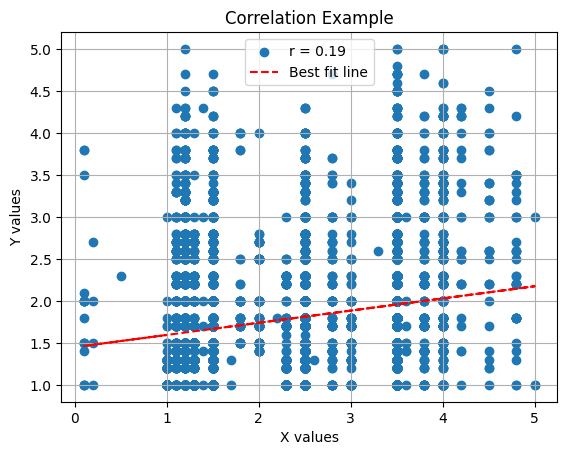

In [ ]:
# Example lists of numbers
x = parsed_answers
y = brick_responses_test["target"].to_list()

# Calculate correlation coefficient
r = np.corrcoef(x, y)[0, 1]

# Plot
plt.scatter(x, y, label=f"r = {r:.2f}")
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x), color="red", linestyle="--", label="Best fit line")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Correlation Example")
plt.legend()
plt.grid(True)
plt.show()


## Test Correlation of other gemini-models